# 1. Data Cleaning

In [1]:
# import relevant modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# first look at dataset as dataframe
df = pd.read_csv('HR_Dataset.csv')
pd.set_option('display.max_columns', None) # display all columns in Jupyter Notebook
print(df.shape, '\n')
df.head(5)

(1480, 38) 



,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [3]:
# check data types
df.dtypes

EmpID                        object
Age                           int64
AgeGroup                     object
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
SalarySlab                   object
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           

In [4]:
# transform object into category
cat_columns = ['EmpID', 'AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 
               'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab', 'Over18', 'OverTime']

for entry in cat_columns:
    df[entry] = df[entry].astype('category') 
df.dtypes


EmpID                       category
Age                            int64
AgeGroup                    category
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
SalarySlab                  category
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
P

In [5]:
# inspect statistics of numerical columns
df.describe().T # transpose table with outcomes

,count,mean,std,min,25%,50%,75%,max
Age,1480.0,36.917568,9.128559,18.0,30.00,36.0,43.00,60.0
DailyRate,1480.0,801.384459,403.126988,102.0,465.00,800.0,1157.00,1499.0
DistanceFromHome,1480.0,9.220270,8.131201,1.0,2.00,7.0,14.00,29.0
Education,1480.0,2.910811,1.023796,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1480.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1480.0,1031.860811,605.955046,1.0,493.75,1027.5,1568.25,2068.0
EnvironmentSatisfaction,1480.0,2.724324,1.092579,1.0,2.00,3.0,4.00,4.0
HourlyRate,1480.0,65.845270,20.328266,30.0,48.00,66.0,83.00,100.0
JobInvolvement,1480.0,2.729730,0.713007,1.0,2.00,3.0,3.00,4.0
JobLevel,1480.0,2.064865,1.105574,1.0,1.00,2.0,3.00,5.0


In [6]:
# check for NaNs
df.isna().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [7]:
# only display rows with NaNs
nan_mask = (df.loc[:, 'YearsWithCurrManager'].isna() == 1)
df.loc[nan_mask, :]

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
28,RM024,21,18-25,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,30,3,Male,96,3,1,Research Scientist,4,Single,1232,Upto 5k,19281,1,Y,No,14,3,4,80,0,0,6,3,0,0,0,NaN
31,RM363,21,18-25,No,Non-Travel,895,Sales,9,2,Medical,1,484,1,Male,39,3,1,Sales Representative,4,Single,2610,Upto 5k,2851,1,Y,No,24,4,3,80,0,3,3,2,3,2,2,NaN
45,RM207,22,18-25,No,Travel_Rarely,1136,Research & Development,5,3,Life Sciences,1,284,4,Male,60,4,1,Research Scientist,2,Divorced,2328,Upto 5k,12392,1,Y,Yes,16,3,1,80,1,4,2,2,4,2,2,NaN
99,RM139,25,18-25,No,Travel_Rarely,959,Sales,28,3,Life Sciences,1,183,1,Male,41,2,2,Sales Executive,3,Married,8639,5k-10k,24835,2,Y,No,18,3,4,80,0,6,3,3,2,2,2,NaN
100,RM256,25,18-25,No,Travel_Rarely,685,Research & Development,1,3,Life Sciences,1,350,1,Female,62,3,2,Manufacturing Director,3,Married,4898,Upto 5k,7505,0,Y,No,12,3,4,80,2,5,3,3,4,2,1,NaN
103,RM406,25,18-25,Yes,Travel_Rarely,688,Research & Development,3,3,Medical,1,538,1,Male,91,3,1,Laboratory Technician,1,Married,4031,Upto 5k,9396,5,Y,No,13,3,3,80,1,6,5,3,2,2,0,NaN
222,RM405,28,26-35,No,Travel_Rarely,1300,Research & Development,17,2,Medical,1,536,3,Male,79,3,2,Laboratory Technician,1,Divorced,4558,Upto 5k,13535,1,Y,No,12,3,4,80,1,10,2,3,10,0,1,NaN
262,RM072,29,26-35,No,Travel_Rarely,1328,Research & Development,2,3,Life Sciences,1,94,3,Male,76,3,1,Research Scientist,2,Married,2703,Upto 5k,4956,0,Y,No,23,4,4,80,1,6,3,3,5,4,0,NaN
264,RM206,29,26-35,Yes,Travel_Rarely,121,Sales,27,3,Marketing,1,283,2,Female,35,3,3,Sales Executive,4,Married,7639,5k-10k,24525,1,Y,No,22,4,4,80,3,10,3,2,10,4,1,NaN
268,RM253,29,26-35,No,Travel_Rarely,665,Research & Development,15,3,Life Sciences,1,346,3,Male,60,3,1,Research Scientist,4,Single,2340,Upto 5k,22673,1,Y,No,19,3,1,80,0,6,1,3,6,5,1,NaN


In [8]:
# inspect statistics of numerical columns for selected rows with NaNs
df.loc[nan_mask, :].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,57.0,36.736842,9.085951,21.0,30.0,36.0,42.0,59.0
DailyRate,57.0,786.017544,383.542906,121.0,504.0,705.0,1136.0,1427.0
DistanceFromHome,57.0,8.157895,7.724704,1.0,2.0,6.0,10.0,29.0
Education,57.0,3.000000,1.035098,1.0,2.0,3.0,4.0,5.0
EmployeeCount,57.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,57.0,237.894737,170.460582,10.0,94.0,197.0,349.0,544.0
EnvironmentSatisfaction,57.0,2.666667,1.170063,1.0,2.0,3.0,4.0,4.0
HourlyRate,57.0,61.964912,18.924630,32.0,46.0,61.0,79.0,97.0
JobInvolvement,57.0,2.807018,0.718098,1.0,2.0,3.0,3.0,4.0
JobLevel,57.0,1.929825,1.066698,1.0,1.0,2.0,3.0,5.0


In [9]:
# data imputation (replace NaNs with median years with current Manager)
df['YearsWithCurrManager'].fillna(value=df['YearsWithCurrManager'].median(), inplace = True)

In [10]:
# review data imputation (sample)
df.loc[[1345, 1360, 1375], :]

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1345,RM259,51,46-55,No,Travel_Rarely,833,Research & Development,1,3,Life Sciences,1,353,3,Male,96,3,1,Research Scientist,4,Married,2723,Upto 5k,23231,1,Y,No,11,3,2,80,0,1,0,2,1,0,0,3.0
1360,RM407,52,46-55,No,Travel_Rarely,319,Research & Development,3,3,Medical,1,543,4,Male,39,2,3,Manufacturing Director,3,Married,7969,5k-10k,19609,2,Y,Yes,14,3,3,80,0,28,4,3,5,4,0,3.0
1375,RM026,53,46-55,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,32,3,Female,58,3,5,Manager,3,Divorced,19094,15k+,10735,4,Y,No,11,3,4,80,1,26,3,2,14,13,4,3.0


In [11]:
# alternative: delete NaN rows
# df.dropna(how='any', axis=0, inplace=True)

In [12]:
# in order to check if EmployeeNumber has 1470 unique values aswell (which is the case)
# df['EmployeeNumber'] = df['EmployeeNumber'].astype('category')

In [13]:
# check (number of) unique values

variables = ['EmpID',                        
'Age',                          
'AgeGroup',                     
'Attrition',                    
'BusinessTravel',               
'DailyRate',                   
'Department',                   
'DistanceFromHome',             
'Education',                    
'EducationField',               
'EmployeeCount',                
'EmployeeNumber',               
'EnvironmentSatisfaction',      
'Gender',                       
'HourlyRate',                   
'JobInvolvement',               
'JobLevel',                     
'JobRole',                      
'JobSatisfaction',              
'MaritalStatus',                
'MonthlyIncome',                
'SalarySlab',                   
'MonthlyRate',                  
'NumCompaniesWorked',           
'Over18',                       
'OverTime',                     
'PercentSalaryHike',            
'PerformanceRating',            
'RelationshipSatisfaction',     
'StandardHours',                
'StockOptionLevel',             
'TotalWorkingYears',            
'TrainingTimesLastYear',        
'WorkLifeBalance',              
'YearsAtCompany',               
'YearsInCurrentRole',           
'YearsSinceLastPromotion',      
'YearsWithCurrManager']

for entry in variables:
    print("\033[1m" + entry.title() + "\033[0m", '\n', df.loc[:, entry].unique(), '\n') # bold text

Empid 
 ['RM297', 'RM302', 'RM458', 'RM728', 'RM829', ..., 'RM412', 'RM428', 'RM537', 'RM880', 'RM1210']
Length: 1470
Categories (1470, object): ['RM001', 'RM002', 'RM003', 'RM004', ..., 'RM996', 'RM997', 'RM998', 'RM999'] 

Age 
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60] 

Agegroup 
 ['18-25', '26-35', '36-45', '46-55', '55+']
Categories (5, object): ['18-25', '26-35', '36-45', '46-55', '55+'] 

Attrition 
 ['Yes', 'No']
Categories (2, object): ['No', 'Yes'] 

Businesstravel 
 ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', 'TravelRarely']
Categories (4, object): ['Non-Travel', 'TravelRarely', 'Travel_Frequently', 'Travel_Rarely'] 

Dailyrate 
 [ 230  812 1306  287  247 1124  544 1431  528 1181  602  303  489  419
  645  504  265  871  959 1362  500  129 1097  769  805  654 1141  727
  391  996  756  895  156 1343 1427 1334  984  251  546  337  501 1123
  534  594 1256 1136  253 1368  604 12

In [14]:
# --> EmpID and EmployeeNumber contain 10 duplicates

In [15]:
# inspect duplicates
duplicates_list = []
df_duplicates = df['EmpID'].duplicated()
for i in range(len(df_duplicates)):
    if df_duplicates[i] == True:
        duplicates_list.append(i)

print(duplicates_list, '\n')
display(df.loc[duplicates_list, :])

[162, 211, 328, 458, 655, 803, 954, 955, 1305, 1336] 



,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
162,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,Upto 5k,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,5.0
211,RM1468,27,26-35,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5k-10k,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3.0
328,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,4,Female,73,2,1,Research Scientist,1,Single,3785,Upto 5k,8489,1,Y,No,14,3,2,80,0,5,3,1,5,4,0,4.0
458,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,5k-10k,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7.0
655,RM1470,34,26-35,No,TravelRarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,Upto 5k,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2.0
803,RM1466,36,36-45,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,Upto 5k,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,2.0
954,RM1463,39,36-45,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,2,Female,60,2,4,Sales Executive,4,Married,12031,10k-15k,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6.0
955,RM1467,39,36-45,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,5k-10k,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,1.0
1305,RM1469,49,46-55,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,5k-10k,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8.0
1336,RM1462,50,46-55,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,4,Male,39,2,3,Sales Executive,1,Divorced,10854,10k-15k,16586,4,Y,Yes,13,3,2,80,1,20,3,3,3,2,2,0.0


In [16]:
# --> last 10 EmpIDs respectively last 10 EmployeeNumbers seem to be duplicates

In [17]:
# sort DataFrame by EmployeeNumber
df = df.sort_values('EmployeeNumber')
df.tail(20)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
327,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,4,Female,73,2,1,Research Scientist,1,Single,3785,Upto 5k,8489,1,Y,No,14,3,2,80,0,5,3,1,5,4,0,4.0
328,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,4,Female,73,2,1,Research Scientist,1,Single,3785,Upto 5k,8489,1,Y,No,14,3,2,80,0,5,3,1,5,4,0,4.0
1335,RM1462,50,46-55,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,4,Male,39,2,3,Sales Executive,1,Divorced,10854,10k-15k,16586,4,Y,Yes,13,3,2,80,1,20,3,3,3,2,2,0.0
1336,RM1462,50,46-55,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,4,Male,39,2,3,Sales Executive,1,Divorced,10854,10k-15k,16586,4,Y,Yes,13,3,2,80,1,20,3,3,3,2,2,0.0
952,RM1463,39,36-45,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,2,Female,60,2,4,Sales Executive,4,Married,12031,10k-15k,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6.0
954,RM1463,39,36-45,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,2,Female,60,2,4,Sales Executive,4,Married,12031,10k-15k,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6.0
458,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,5k-10k,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7.0
457,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,5k-10k,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7.0
162,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,Upto 5k,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,5.0
161,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,2966,Upto 5k,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,0.0


In [18]:
# remove duplicates
df = df.drop_duplicates(subset=['EmployeeNumber'], keep='first')
df.tail(20)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
731,RM1451,35,26-35,No,Travel_Rarely,1146,Human Resources,26,4,Life Sciences,1,2040,3,Female,31,3,3,Human Resources,4,Single,8837,5k-10k,16642,1,Y,Yes,16,3,3,80,0,9,2,3,9,0,1,7.0
911,RM1452,38,36-45,No,TravelRarely,345,Sales,10,2,Life Sciences,1,2041,1,Female,100,3,2,Sales Executive,4,Married,5343,5k-10k,5982,1,Y,No,11,3,3,80,1,10,1,3,10,7,1,9.0
1334,RM1453,50,46-55,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,2,Male,94,3,2,Sales Executive,3,Divorced,6728,5k-10k,14255,7,Y,No,12,3,4,80,2,12,3,3,6,3,0,1.0
801,RM1454,36,36-45,No,Travel_Rarely,1120,Sales,11,4,Marketing,1,2045,2,Female,100,2,2,Sales Executive,4,Married,6652,5k-10k,14369,4,Y,No,13,3,1,80,1,8,2,2,6,3,0,0.0
1204,RM1455,45,36-45,No,Travel_Rarely,374,Sales,20,3,Life Sciences,1,2046,4,Female,50,3,2,Sales Executive,3,Single,4850,Upto 5k,23333,8,Y,No,15,3,3,80,0,8,3,3,5,3,0,1.0
1011,RM1456,40,36-45,No,Travel_Rarely,1322,Research & Development,2,4,Life Sciences,1,2048,3,Male,52,2,1,Research Scientist,3,Single,2809,Upto 5k,2725,2,Y,No,14,3,4,80,0,8,2,3,2,2,2,2.0
732,RM1457,35,26-35,No,Travel_Frequently,1199,Research & Development,18,4,Life Sciences,1,2049,3,Male,80,3,2,Healthcare Representative,3,Married,5689,5k-10k,24594,1,Y,Yes,14,3,4,80,2,10,2,4,10,2,0,2.0
1012,RM1458,40,36-45,No,Travel_Rarely,1194,Research & Development,2,4,Medical,1,2051,3,Female,98,3,1,Research Scientist,3,Married,2001,Upto 5k,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2.0
733,RM1459,35,26-35,No,Travel_Rarely,287,Research & Development,1,4,Life Sciences,1,2052,3,Female,62,1,1,Research Scientist,4,Married,2977,Upto 5k,8952,1,Y,No,12,3,4,80,1,4,5,3,4,3,1,1.0
326,RM1460,29,26-35,No,Travel_Rarely,1378,Research & Development,13,2,Other,1,2053,4,Male,46,2,2,Laboratory Technician,2,Married,4025,Upto 5k,23679,4,Y,Yes,13,3,1,80,1,10,2,3,4,3,0,3.0


In [19]:
# sort DataFrame by index again
df = df.sort_index()
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [20]:
# remove irrelevant columns
df = df.drop('EmployeeCount', axis=1)
df = df.drop('Over18', axis=1)
df = df.drop('StandardHours', axis=1)

print(df.shape, '\n')

(1470, 35) 



In [21]:
# remove columns which contain highly unrealistic or impossible values: daily, hourly and monthly rate (or just ignore them)
#df = df.drop('DailyRate', axis=1)
#df = df.drop('HourlyRate', axis=1)
#df = df.drop('MonthlyRate', axis=1)

In [22]:
print(df.shape, '\n')
df.head()

(1470, 35) 



,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,No,13,3,3,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,No,12,3,1,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Yes,14,3,4,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,No,15,3,4,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,No,12,3,4,0,0,0,3,0,0,0,0.0


In [23]:
# are age and total working years consistent?
# calculate difference between age and working years to get career entry age
series_realistic_age = df.loc[:, 'Age'] - df.loc[:, 'TotalWorkingYears']
df_realistic_age = pd.DataFrame(series_realistic_age)
display(df_realistic_age)
print(df_realistic_age.iloc[:, 0].min()) # 18 --> realistic
print(df_realistic_age.iloc[:, 0].max()) # 56 --> rather unrealistic (ignore for now because mean is...
print(df_realistic_age.iloc[:, 0].mean()) # 25.6 --> ...realistic)

,0
0,18
1,18
2,18
3,18
4,18
...,...
1475,27
1476,38
1477,50
1478,48


18
56
25.64421768707483


# 2. Exploratory Data Analysis (EDA)

# 2.1 Company Structure

In [24]:
# number of current and former employees, departments, salary slabs, total payroll costs/per employee (using monthly income),
# distribution of employees among different job roles and levels

# 2.2 Sociodemographic Profile of Employees

In [25]:
# age distribution, gender ratio, educational background, marital status

# 2.3 Occupational Profile of Employees

In [26]:
# business travel, distance from home, job role, job level, monthly Income, NumCompaniesWorked, overtime, 
# salary hike, stock option level, total working years, trainings, years at company / since last promotion / with curr manager

# 2.4 Assessments

In [27]:
# regarding the employee: job involvement, performance rating
# regarding the job: environment satisfaction, job satisfaction, relationship satisfaction, work life balance

Deskriptive Statistik:
       JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
count     1470.000000        1470.000000              1470.000000   
mean         2.729932           3.153741                 2.721769   
std          0.711561           0.360824                 1.093082   
min          1.000000           3.000000                 1.000000   
25%          2.000000           3.000000                 2.000000   
50%          3.000000           3.000000                 3.000000   
75%          3.000000           3.000000                 4.000000   
max          4.000000           4.000000                 4.000000   

       JobSatisfaction  RelationshipSatisfaction  WorkLifeBalance  
count      1470.000000               1470.000000      1470.000000  
mean          2.728571                  2.712245         2.761224  
std           1.102846                  1.081209         0.706476  
min           1.000000                  1.000000         1.000000  
25%           2

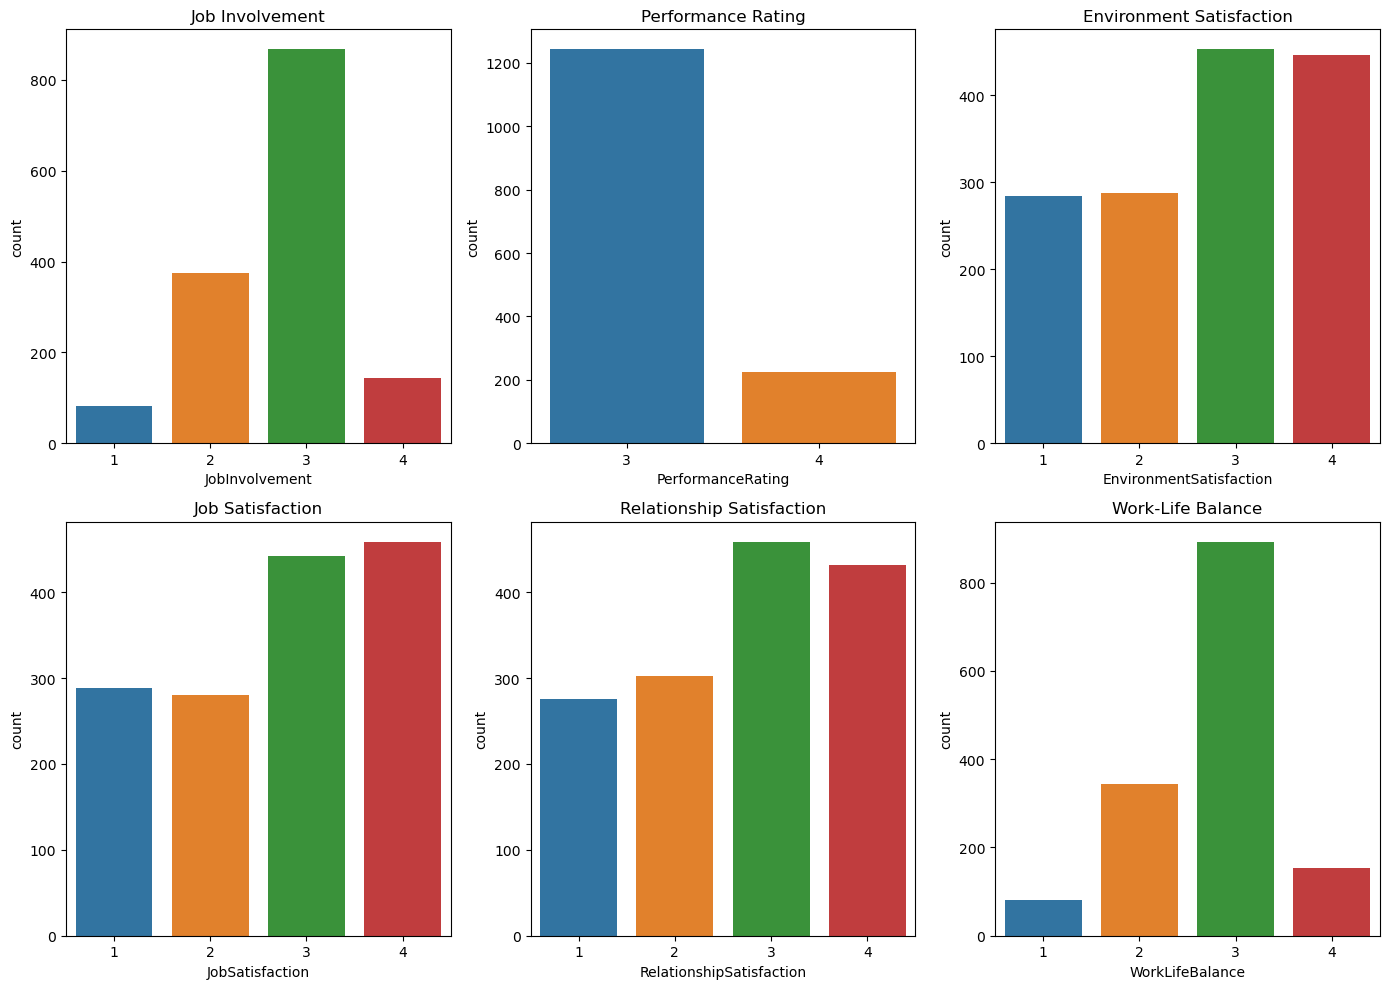

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filtere den Datensatz um relevante Merkmale
relevant_columns = ['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']
filtered_df = df[relevant_columns]

# Deskriptive Statistik
print("Deskriptive Statistik:")
print(filtered_df.describe())

# Visualisierung der Verteilung der Bewertungen
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='JobInvolvement', data=df)
plt.title('Job Involvement')

plt.subplot(2, 3, 2)
sns.countplot(x='PerformanceRating', data=df)
plt.title('Performance Rating')

plt.subplot(2, 3, 3)
sns.countplot(x='EnvironmentSatisfaction', data=df)
plt.title('Environment Satisfaction')

plt.subplot(2, 3, 4)
sns.countplot(x='JobSatisfaction', data=df)
plt.title('Job Satisfaction')

plt.subplot(2, 3, 5)
sns.countplot(x='RelationshipSatisfaction', data=df)
plt.title('Relationship Satisfaction')

plt.subplot(2, 3, 6)
sns.countplot(x='WorkLifeBalance', data=df)
plt.title('Work-Life Balance')

plt.tight_layout()
plt.show()


# 3. Data Analysis (goal: improve employee performance, job satisfaction and employee loyalty)

In [29]:
# select interesting variables and correlations
# sns.heatmap(xxx)
# sns.pairplot(df)

# 3.1 Identification of Possible Measures to increase Job Satisfaction

# 3.2 Identification of Possibe Measures to increase Performance Ratings

# 3.3 Prediction of Future Attrition

# 3.4 Bonus: Examination of Possible (adjusted) Gender Pay Gap within the organization and departments

# 4. Data Visualization